In [1]:
#Edgar Moises Hernandez-Gonzalez
#08/07/19-04/11/19
#clasificar EEG de habla imaginada con CNN
#1 capa de 32@3x33

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
datos = pd.read_csv("Submuestreo02.csv", header=None)
x = datos.iloc[:, 0:3072].values
y = datos.iloc[:, 3072].values

num_classes = 6
n_samples = len(y)
print(x.shape)
print(y.shape)
print(n_samples)

(225, 3072)
(225,)
225


In [4]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [5]:
#convertir de 2D a 4D
x = x.reshape((n_samples, 6, 512, 1))
print(x.shape)

(225, 6, 512, 1)


In [6]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 33), activation='relu', input_shape=(6, 512, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 4, 480, 32)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 240, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15360)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                983104    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 986,694
Trainable params: 986,694
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_test, y_test))

Train on 168 samples, validate on 57 samples
Epoch 1/20
168/168 [==============================] - 3s 21ms/sample - loss: 3.1374 - acc: 0.1667 - val_loss: 2.7609 - val_acc: 0.2456
Epoch 2/20
168/168 [==============================] - 0s 405us/sample - loss: 2.5063 - acc: 0.1548 - val_loss: 2.0082 - val_acc: 0.1404
Epoch 3/20
168/168 [==============================] - 0s 415us/sample - loss: 1.7573 - acc: 0.3214 - val_loss: 2.0677 - val_acc: 0.1228
Epoch 4/20
168/168 [==============================] - 0s 483us/sample - loss: 1.7286 - acc: 0.2798 - val_loss: 2.0021 - val_acc: 0.1404
Epoch 5/20
168/168 [==============================] - 0s 427us/sample - loss: 1.6617 - acc: 0.3452 - val_loss: 1.8516 - val_acc: 0.0877
Epoch 6/20
168/168 [==============================] - 0s 461us/sample - loss: 1.5659 - acc: 0.4048 - val_loss: 1.8357 - val_acc: 0.0702
Epoch 7/20
168/168 [==============================] - 0s 465us/sample - loss: 1.4284 - acc: 0.5238 - val_loss: 1.8533 - val_acc: 0.1228
Epoc

In [11]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

57/57 [==============================] - 0s 528us/sample - loss: 2.7616 - acc: 0.2632
Test loss: 2.7616006826099597
Test accuracy: 0.2631579


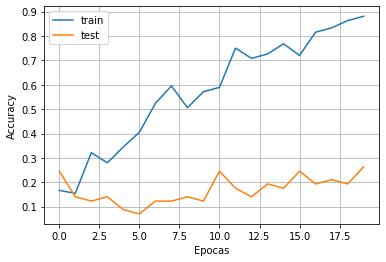

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

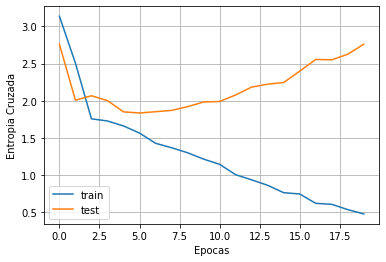

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()